## Procedure

1. Import Libraries
2. Load the PIMA Indian diabetes dataset
3. Exploratory data analysis
    1. Spread of the data
    2. Encoding of the target variable (Convert label 0 to (-1))
    3. Missing values
    4. Unique label values
    5. Frequency of each label (to check biasness)
4. Spit the data into train and test
5. Data Pre-processing
    1. Convert to numpy array (perceptron takes numpy array as an input)
    2. Rescale the input features (perceptron converges faster with scaled data)
6. Design Perceptron
    1. Takes learning rate and number of iterations as default parameters.
    2. Defined fit method to fit/feed data to perceptron.
    3. Defined predict method for diabetes detection.
    4. Defined activation method to activate a neuron as an activation function.
    5. Defined get_accuracy method to display overall accuracy.
    6. Defined get_report method which provides classification report.
    7. Defined get_sens_spec method to show true positive and true negative rate.
    8. Defined tuning method which tunes the hyperparameters to achieve optimal performance.

## Import Libraries

In [1]:
# Data processing, file I/O etc
import pandas as pd
# Mathematical operations (Linear algebra)
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Split the data
from sklearn.model_selection import train_test_split
# Data scaling (standardization)
from sklearn.preprocessing import StandardScaler
# Performance Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Neglate warnings
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory data analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df["Outcome"] = df["Outcome"].replace(0,-1)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df["Outcome"].value_counts()

-1    500
 1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

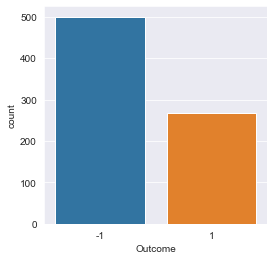

In [7]:
plt.figure(figsize = (4,4)) 
sns.set_style("darkgrid")
sns.countplot(df["Outcome"])

## Split the data into train and test

In [8]:
x = df.iloc[:,:8]
y = df["Outcome"]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [10]:
print("Shape of training data:",x_train.shape)
print("Shape of testing data:",x_test.shape)

Shape of training data: (614, 8)
Shape of testing data: (154, 8)


## Data Pre-processing

In [11]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [12]:
unique,count = np.unique(y_test,return_counts=True)
print("Label counts in testing dataset:")
print(np.asarray((unique, count)).T)

Label counts in testing dataset:
[[ -1 100]
 [  1  54]]


In [13]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Design a perceptron

In [14]:
class Perceptron:
    # default parameters learning rate and number of iterations
    def __init__(self,learning_rate=0.01,n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self.activation
        self.weights = None
        self.bias = None
    # fit the data and update the respective weights based on optimization algorithm    
    def fit(self,x,y):
        n_samples,n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                lo = self.bias + np.dot(x_i,self.weights)
                y_pred = self.activation_func(lo)
                error = y[idx] - y_pred
                update = self.lr * error
                # update weights
                self.weights += (update * x_i)
                self.bias += update
    # predict the results by using activation function   
    def predict(self,x):
        lo = np.dot(x,self.weights) + self.bias
        y_pred = self.activation_func(lo)
        return y_pred
    # defined unit-step function as an activation fuction   
    def activation(self,x):
        return np.where(x>=0,1,-1)
    
    def get_accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred) / len(y)
        print("Overall accuracy: ",acc)
        print("--------------------------------------------")
    
    def get_report(self,y,y_pred):
        target_names = ['class -1', 'class 1']
        print("Classification Report:")
        print(classification_report(y, y_pred, target_names=target_names))
        print("--------------------------------------------")
        
    def get_sens_spec(self,y,y_pred):
        confusion_matrix(y_test, preds)
        tn,fp,fn,tp = confusion_matrix(y_test, preds).ravel()
        specificity = tn / (tn+fp)
        sensitivity = tp / (tp+fn)
        print("Sensitivity: ",sensitivity)
        print("Specificity: ",specificity)
        print("--------------------------------------------")
    # takes different values of learning rate and iterations as a list. Applies different combinations of user given values of hyper-parameters.     
    def tuning(self,learning_rate,n_iters,train_features,train_target,pred_feature,test_target):
        print("Tuning:")
        print("-------")
        for i in learning_rate:
            for j in n_iters:
                p = Perceptron(learning_rate=i,n_iters=j)
                p.fit(train_features,train_target)
                preds = p.predict(pred_feature)
                print("Learning rate: ",i)
                print("Number of iterations: ",j)
                p.get_accuracy(test_target,preds)
                print("--------------------------------------------")
       

In [15]:
# created an object of a perceptron
p = Perceptron(learning_rate=0.01,n_iters=100)
# preceptron fitting and prediction
p.fit(x_train,y_train)
preds = p.predict(x_test)

In [16]:
# testing dataset accuracy
p.get_accuracy(y_test,preds)

Overall accuracy:  0.6493506493506493
--------------------------------------------


In [17]:
# classification report of model on testing set
p.get_report(y_test,preds)

Classification Report:
              precision    recall  f1-score   support

    class -1       0.77      0.65      0.71       100
     class 1       0.50      0.65      0.56        54

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.68      0.65      0.66       154

--------------------------------------------


In [18]:
# model sensitivity and specificity on testing dataset
p.get_sens_spec(y_test,preds)

Sensitivity:  0.6481481481481481
Specificity:  0.65
--------------------------------------------


In [21]:
# Tuning
learning_rate = [0.01]
n_iters = [2000,4000,6000]
p.tuning(learning_rate,n_iters,x_train,y_train,x_test,y_test)

Tuning:
-------
Learning rate:  0.01
Number of iterations:  2000
Overall accuracy:  0.6883116883116883
--------------------------------------------
--------------------------------------------
Learning rate:  0.01
Number of iterations:  4000
Overall accuracy:  0.7207792207792207
--------------------------------------------
--------------------------------------------
Learning rate:  0.01
Number of iterations:  6000
Overall accuracy:  0.6688311688311688
--------------------------------------------
--------------------------------------------


In [22]:
# Created a new object of a perceptron with new hyper-parameters based on tuning
p = Perceptron(learning_rate=0.01,n_iters=4000)
p.fit(x_train,y_train)
preds = p.predict(x_test)
# performance on testing dataset
p.get_accuracy(y_test,preds)
p.get_report(y_test,preds)
p.get_sens_spec(y_test,preds)

Overall accuracy:  0.7207792207792207
--------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    class -1       0.82      0.73      0.77       100
     class 1       0.58      0.70      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

--------------------------------------------
Sensitivity:  0.7037037037037037
Specificity:  0.73
--------------------------------------------
